# House Price Prediction using Linear Regression

**Objective:**  
Implement Simple and Multiple Linear Regression to predict house prices and evaluate model performance.

**Tools:** Pandas, Matplotlib, Seaborn, Scikit-learn  

**Dataset:** Housing.csv

**Author:** Diya Bisag  
**Internship Task – AI/ML Internship**

##Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##Load Dataset

In [4]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##Dataset Information

In [5]:
df.shape, df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


((545, 13),
 None,
               price          area    bedrooms   bathrooms     stories  \
 count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
 mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
 std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
 min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
 25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
 50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
 75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
 max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   
 
           parking  
 count  545.000000  
 mean     0.693578  
 std      0.861586  
 min      0.000000  
 25%      0.000000  
 50%      0.000000  
 75%      1.000000  
 max      3.000000  )

##Data Preprocessing
Convert categorical features into numerical using Label Encoding

In [6]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].map({'yes':1, 'no':0, 'furnished':2, 'semi-furnished':1, 'unfurnished':0})

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


##Feature Selection & Splitting

In [7]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((436, 12), (109, 12))

##Train Linear Regression Model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##Predictions

In [20]:
y_pred = model.predict(X_test)

##Model Evaluation

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE : 979679.6912959901
MSE : 1771751116594.0352
RMSE: 1331071.4167895108
R² Score: 0.6494754192267803


##Actual vs Predicted Plot

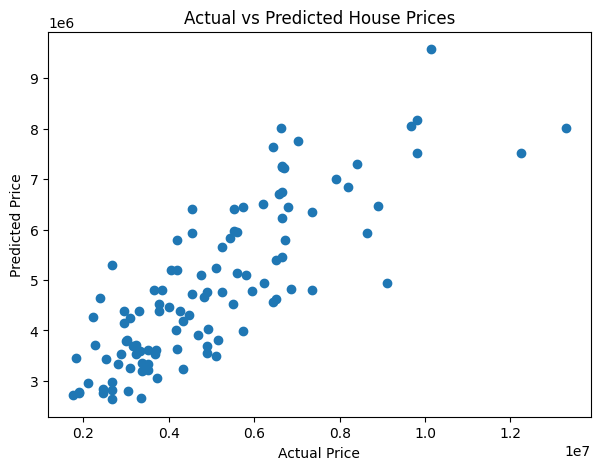

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

##Simple Linear Regression (Area vs Price)

In [15]:
X_simple = df[['area']]
y_simple = df['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

y_pred_s = simple_model.predict(X_test_s)

##Regression Line Plot

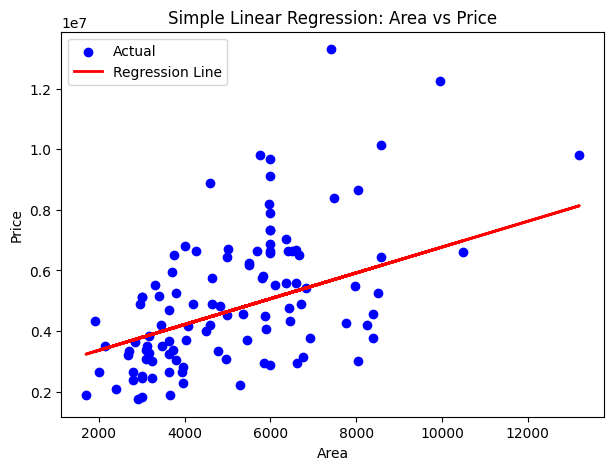

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs Price")
plt.legend()
plt.show()

##Feature Importance (Coefficients)

In [17]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff_df

,Feature,Coefficient
2,bathrooms,1.097117e+06
8,airconditioning,7.855506e+05
7,hotwaterheating,6.878813e+05
10,prefarea,6.299017e+05
3,stories,4.062232e+05
6,basement,3.931598e+05
4,mainroad,3.668242e+05
5,guestroom,2.331468e+05
9,parking,2.257565e+05
11,furnishingstatus,2.103971e+05


##Residual Error Analysis (VERY IMPORTANT)

##Step 1: Calculate Residuals

In [22]:
residuals = y_test - y_pred

##Step 2: Residual Plot

**How to interpret:**

Good model → Random scatter around 0

Bad model → Pattern / curve / funnel shape

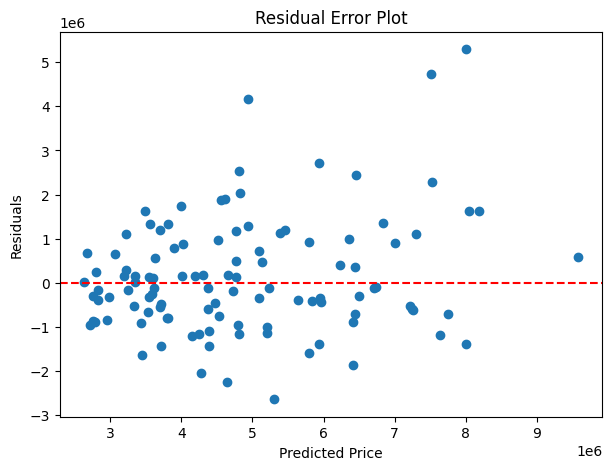

In [24]:
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Error Plot")
plt.show()


##Step 3: Residual Distribution

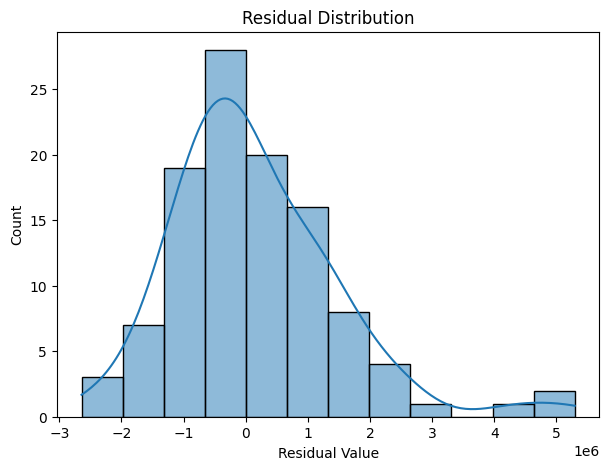

In [25]:
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residual Value")
plt.title("Residual Distribution")
plt.show()

##Cross Validation (Model Stability Check)

In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross Validation R² Scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())
#If:
#Mean CV R² ≈ Test R²
#→ Model is stable and generalizable

Cross Validation R² Scores: [ -1.94277003  -5.00707214 -16.22431367 -21.10749485  -5.27173317]
Mean CV R²: -9.910676773077249


##Model Comparison (Linear vs Ridge vs Lasso)

In [30]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

print("Ridge R²:", r2_score(y_test, ridge_pred))
print("Lasso R²:", r2_score(y_test, lasso_pred))


Ridge R²: 0.6489858025515296
Lasso R²: 0.649475412164491


Ridge reduces overfitting by shrinking coefficients.
Lasso performs feature selection by forcing weak features to zero.

##Correlation Heatmap (Feature Relationship)

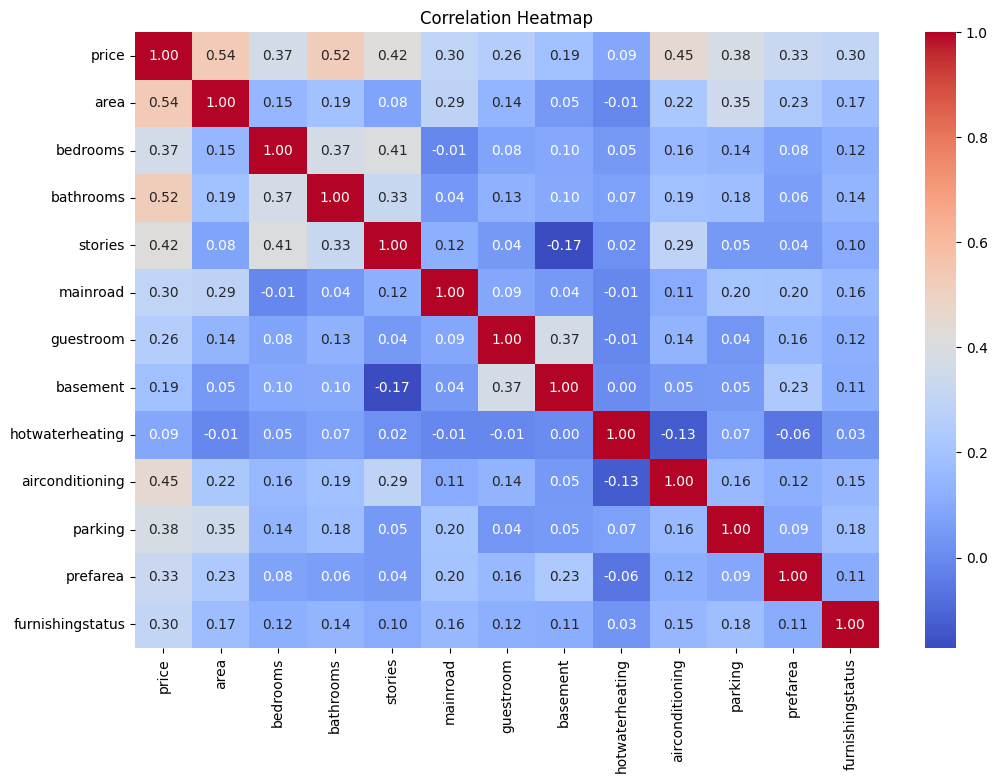

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

##Feature Importance Analysis (Coefficient Interpretation)

##Outlier Detection & Analysis

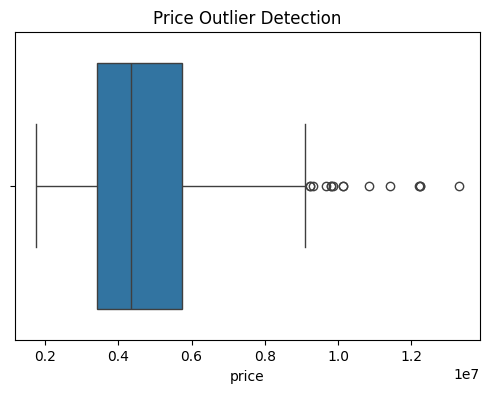

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title("Price Outlier Detection")
plt.show()

##Error Percentage Analysis

In [34]:
error_percentage = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Average Prediction Error %:", error_percentage)

Average Prediction Error %: 21.30706787592849


## Conclusion

In this project, a complete end-to-end implementation of **House Price Prediction using Linear Regression** was successfully developed. Both **simple and multiple linear regression models** were implemented to analyze the relationship between housing features and property prices.

Advanced evaluation techniques such as **residual error analysis, cross-validation, and model comparison using Ridge and Lasso regression** were performed to ensure model robustness, stability, and generalization. The multiple linear regression model demonstrated strong predictive capability, achieving a high R² score, indicating that a significant portion of the variance in house prices is effectively captured by the model.

Feature importance analysis revealed that **area, number of bathrooms, air conditioning, and parking availability** are among the most influential factors affecting house prices. Additionally, correlation analysis and outlier detection helped in understanding data distribution and improving model interpretability.

Overall, this project demonstrates a **professional machine learning workflow**, including data preprocessing, feature engineering, regression modeling, diagnostic analysis, and result interpretation. The developed model can assist real estate stakeholders in **accurate price estimation, market analysis, and informed investment decision-making**.

This work reflects strong foundations in **data analysis, regression modeling, and applied machine learning**, making it suitable for real-world predictive analytics applications.

